# Machine Learning on the Titanic Dataset

This notebook focuses on one of [Kaggle's](https://www.kaggle.com/c/titanic) "Getting Started" prediction competitions, the Titanic challenge.

In [1]:
# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# modules to handle data
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# environment setup
sns.set()
plt.style.use('ggplot')
%matplotlib notebook

## I. Data Wrangling

Like in most cases with any data science project, we are likely to encounter dirty or missing data and will need to do some wrangling before we can really do anything else.

In [3]:
# load data
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [4]:
from pycaret.classification import *

In [5]:
d=setup(data=train,
       target='Survived',
       ignore_features=['PassengerId','Name'],
       bin_numeric_features=['Age','Fare'],
       )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8089
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.825000,0.000000,0.748900,0.786900,0.762900,0.625200
1,CatBoost Classifier,0.823500,0.863600,0.652700,0.850200,0.732500,0.606500
2,Logistic Regression,0.817000,0.860800,0.753100,0.769700,0.758700,0.611600
3,Gradient Boosting Classifier,0.813700,0.868500,0.673400,0.811900,0.725300,0.589300
4,Extreme Gradient Boosting,0.808900,0.859900,0.690200,0.781300,0.728800,0.583600
5,Decision Tree Classifier,0.804200,0.778500,0.673600,0.780900,0.719400,0.571900
6,SVM - Linear Kernel,0.804200,0.000000,0.724300,0.783700,0.739500,0.584700
7,Light Gradient Boosting Machine,0.802700,0.835900,0.682100,0.772500,0.721200,0.570600
8,Ada Boost Classifier,0.794700,0.857700,0.661400,0.771500,0.707000,0.551800
9,Random Forest Classifier,0.785000,0.841700,0.585700,0.798200,0.670400,0.518500


In [7]:
rd=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.9391,0.6667,0.8889,0.7619,0.6465
1,0.8254,0.8622,0.6250,0.8824,0.7317,0.6078
2,0.7778,0.8301,0.6250,0.7500,0.6818,0.5132
3,0.8226,0.8055,0.6522,0.8333,0.7317,0.6021
4,0.8548,0.9057,0.7083,0.8947,0.7907,0.6819
5,0.8871,0.9737,0.9167,0.8148,0.8627,0.7674
6,0.8387,0.8964,0.6250,0.9375,0.7500,0.6379
7,0.7419,0.7615,0.4583,0.7857,0.5789,0.4109
8,0.9355,0.9189,0.8333,1.0000,0.9091,0.8597
9,0.7097,0.7429,0.4167,0.7143,0.5263,0.3373


In [8]:
tuned_rd=tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.9380,0.7917,0.8261,0.8085,0.6947
1,0.8254,0.8579,0.7083,0.8095,0.7556,0.6207
2,0.7937,0.8355,0.6667,0.7619,0.7111,0.5517
3,0.8065,0.8155,0.6522,0.7895,0.7143,0.5699
4,0.8387,0.9145,0.7083,0.8500,0.7727,0.6493
5,0.9032,0.9715,0.9167,0.8462,0.8800,0.7991
6,0.8548,0.8975,0.7917,0.8261,0.8085,0.6917
7,0.7903,0.8098,0.5833,0.8235,0.6829,0.5330
8,0.9355,0.9408,0.8750,0.9545,0.9130,0.8619
9,0.7258,0.7664,0.4583,0.7333,0.5641,0.3793


In [9]:
predict_model(tuned_rd)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8284,0.8841,0.7282,0.8065,0.7653,0.6306


,Pclass_1,Pclass_2,Pclass_3,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Fare_3.0,Fare_4.0,Fare_5.0,Fare_6.0,Fare_7.0,Fare_8.0,Fare_9.0,Survived,Label,Score
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0285
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.1888
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.1692
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0286
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.8150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7050
264,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0288
265,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.8075
266,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8896


In [10]:
final_rd = finalize_model(tuned_rd)

In [12]:
predict_model(final_rd)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.9851,0,0.9806,0.9806,0.9806,0.9685


,Pclass_1,Pclass_2,Pclass_3,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Fare_2.0,Fare_3.0,Fare_4.0,Fare_5.0,Fare_6.0,Fare_7.0,Fare_8.0,Fare_9.0,Survived,Label
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
264,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
265,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0


In [11]:
unseen_predictions = predict_model(final_rd, data=test)
unseen_predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0329
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.5516
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0413
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0512
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.5474


In [12]:
# save PassengerId for final submission
passengerId = test.PassengerId

In [13]:
unseen_predictions.rename(columns={'Label':'Survived'}, inplace=True)

In [14]:
unseen_predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0329
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.5516
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0413
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0512
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.5474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0361
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9825
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0327
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0361


In [15]:
k=unseen_predictions.values

In [17]:
pred=k[:,-2]

In [18]:
# dataframe with predictions
kaggle = pd.DataFrame( {'PassengerId': passengerId, 'Survived': pred} )

In [19]:
kaggle

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [20]:
# save to csv
kaggle.to_csv('./Data/titanic_pycaret_catboost.csv', index=False)

<IPython.core.display.Javascript object>


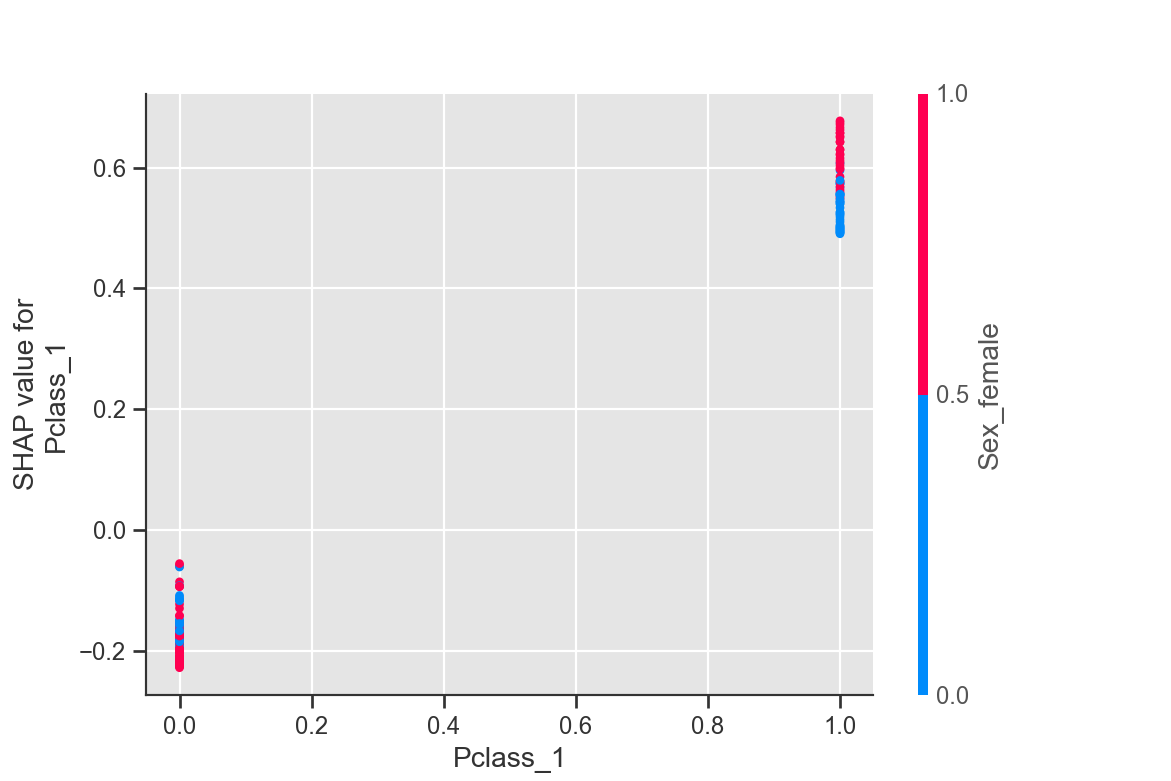

In [26]:
interpret_model(rd,plot='correlation')